
Source codes for Python Machine Learning By Example 4th Edition (Packt Publishing)

Chapter 5 Predicting Stock Price with Regression Algorithms

Author: Yuxi (Hayden) Liu (yuxi.liu.ece@gmail.com)


# Mining stock price data 

## Acquiring data and generating features

In [1]:
import pandas as pd

In [2]:
mydata = pd.read_csv('20051201_20051210.csv', index_col='Date')
mydata


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-12-01,2244.850098,2269.389893,2244.709961,2267.169922,2267.169922,2010420000
2005-12-02,2266.169922,2273.610107,2261.129883,2273.370117,2273.370117,1758510000
2005-12-05,2269.070068,2269.479980,2250.840088,2257.639893,2257.639893,1659920000
2005-12-06,2267.760010,2278.159912,2259.370117,2260.760010,2260.760010,1788200000
2005-12-07,2263.290039,2264.909912,2244.620117,2252.010010,2252.010010,1733530000
2005-12-08,2254.800049,2261.610107,2233.739990,2246.459961,2246.459961,1908360000
2005-12-09,2247.280029,2258.669922,2241.030029,2256.729980,2256.729980,1658570000


In [3]:
def add_original_feature(df, df_new):
    df_new['open'] = df['Open']
    df_new['open_1'] = df['Open'].shift(1)
    df_new['close_1'] = df['Close'].shift(1)
    df_new['high_1'] = df['High'].shift(1)
    df_new['low_1'] = df['Low'].shift(1)
    df_new['volume_1'] = df['Volume'].shift(1)
    

In [4]:
def add_avg_price(df, df_new): 
    df_new['avg_price_5'] = df['Close'].rolling(5).mean().shift(1)
    df_new['avg_price_30'] = df['Close'].rolling(21).mean().shift(1)
    df_new['avg_price_365'] = df['Close'].rolling(252).mean().shift(1)
    df_new['ratio_avg_price_5_30'] = df_new['avg_price_5'] / df_new['avg_price_30']
    df_new['ratio_avg_price_5_365'] = df_new['avg_price_5'] / df_new['avg_price_365']
    df_new['ratio_avg_price_30_365'] = df_new['avg_price_30'] / df_new['avg_price_365']
    

In [5]:
def add_avg_volume(df, df_new):
    df_new['avg_volume_5'] = df['Volume'].rolling(5).mean().shift(1)
    df_new['avg_volume_30'] = df['Volume'].rolling(21).mean().shift(1)
    df_new['avg_volume_365'] = df['Volume'].rolling(252).mean().shift(1)
    df_new['ratio_avg_volume_5_30'] = df_new['avg_volume_5'] / df_new['avg_volume_30']
    df_new['ratio_avg_volume_5_365'] = df_new['avg_volume_5'] / df_new['avg_volume_365']
    df_new['ratio_avg_volume_30_365'] = df_new['avg_volume_30'] / df_new['avg_volume_365']
    

In [6]:
def add_std_price(df, df_new):
    df_new['std_price_5'] = df['Close'].rolling(5).std().shift(1)
    df_new['std_price_30'] = df['Close'].rolling(21).std().shift(1)
    df_new['std_price_365'] = df['Close'].rolling(252).std().shift(1)
    df_new['ratio_std_price_5_30'] = df_new['std_price_5'] / df_new['std_price_30']
    df_new['ratio_std_price_5_365'] = df_new['std_price_5'] / df_new['std_price_365']
    df_new['ratio_std_price_30_365'] = df_new['std_price_30'] / df_new['std_price_365']
    

In [7]:
def add_std_volume(df, df_new):
    df_new['std_volume_5'] = df['Volume'].rolling(5).std().shift(1)
    df_new['std_volume_30'] = df['Volume'].rolling(21).std().shift(1)
    df_new['std_volume_365'] = df['Volume'].rolling(252).std().shift(1)
    df_new['ratio_std_volume_5_30'] = df_new['std_volume_5'] / df_new['std_volume_30']
    df_new['ratio_std_volume_5_365'] = df_new['std_volume_5'] / df_new['std_volume_365']
    df_new['ratio_std_volume_30_365'] = df_new['std_volume_30'] / df_new['std_volume_365']
    

In [8]:
def add_return_feature(df, df_new):
    df_new['return_1'] = ((df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1)).shift(1)
    df_new['return_5'] = ((df['Close'] - df['Close'].shift(5)) / df['Close'].shift(5)).shift(1)
    df_new['return_30'] = ((df['Close'] - df['Close'].shift(21)) / df['Close'].shift(21)).shift(1)
    df_new['return_365'] = ((df['Close'] - df['Close'].shift(252)) / df['Close'].shift(252)).shift(1)
    df_new['moving_avg_5'] = df_new['return_1'].rolling(5).mean().shift(1)
    df_new['moving_avg_30'] = df_new['return_1'].rolling(21).mean().shift(1)
    df_new['moving_avg_365'] = df_new['return_1'].rolling(252).mean().shift(1)
    

In [9]:
def generate_features(df):
    """
    Generate features for a stock/index based on historical price and performance
    @param df: dataframe with columns "Open", "Close", "High", "Low", "Volume", "Adj Close"
    @return: dataframe, data set with new features
    """
    df_new = pd.DataFrame()
    # 6 original features
    add_original_feature(df, df_new)
    # 31 generated features
    # average price
    add_avg_price(df, df_new)
    # average volume
    add_avg_volume(df, df_new)
    # standard deviation of prices
    add_std_price(df, df_new)
    # standard deviation of volumes
    add_std_volume(df, df_new)
    # # return
    add_return_feature(df, df_new)
    # the target
    df_new['close'] = df['Close']
    df_new = df_new.dropna(axis=0)
    return df_new


In [10]:
data_raw = pd.read_csv('19900101_20230630.csv', index_col='Date')
data = generate_features(data_raw)
print(data.round(decimals=3).head(5))


             open  open_1  close_1  high_1  low_1     volume_1  avg_price_5  \
Date                                                                          
1991-01-03  371.2   373.0    372.2   373.5  371.8   92020000.0       372.14   
1991-01-04  366.5   371.2    367.5   371.8  367.4  108390000.0       371.16   
1991-01-07  363.5   366.5    367.2   367.9  365.9  103830000.0       370.38   
1991-01-08  359.1   363.5    360.2   365.8  360.1  109460000.0       368.18   
1991-01-09  362.4   359.1    359.0   360.5  358.2  111730000.0       365.22   

            avg_price_30  avg_price_365  ratio_avg_price_5_30  ...  \
Date                                                           ...   
1991-01-03       370.305        408.631                 1.005  ...   
1991-01-04       370.600        408.266                 1.002  ...   
1991-01-07       370.748        407.905                 0.999  ...   
1991-01-08       370.238        407.514                 0.994  ...   
1991-01-09       369.605  

# Estimating with linear regression 

## Implementing linear regression from scratch 

In [11]:
import numpy as np

In [12]:
def compute_prediction(X, weights):
    """
    Compute the prediction y_hat based on current weights
    """
    return np.dot(X, weights)


In [13]:
def update_weights_gd(X_train, y_train, weights, learning_rate):
    """
    Update weights by one step and return updated wights
    """
    predictions = compute_prediction(X_train, weights)
    weights_delta = np.dot(X_train.T, y_train - predictions)
    m = y_train.shape[0]
    weights += learning_rate / float(m) * weights_delta
    return weights


In [14]:
def compute_loss(X, y, weights):
    """
    Compute the loss J(w)
    """
    predictions = compute_prediction(X, weights)
    return np.mean((predictions - y) ** 2 / 2.0)


In [15]:
def train_linear_regression(X_train, y_train, max_iter, learning_rate, fit_intercept=False, display_loss=500):
    """
    Train a linear regression model with gradient descent, and return trained model
    """
    if fit_intercept:
        intercept = np.ones((X_train.shape[0], 1))
        X_train = np.hstack((intercept, X_train))
    weights = np.zeros(X_train.shape[1])
    for iteration in range(max_iter):
        weights = update_weights_gd(X_train, y_train, weights, learning_rate)
        # Check the cost for every 500 (by default) iterations
        if iteration % display_loss == 0:
            print(compute_loss(X_train, y_train, weights))
    return weights


In [16]:
def predict(X, weights):
    if X.shape[1] == weights.shape[0] - 1:
        intercept = np.ones((X.shape[0], 1))
        X = np.hstack((intercept, X))
    return compute_prediction(X, weights)


In [17]:
# A small example
X_train = np.array([[6], [2], [3], [4], [1], [5], [2], [6], [4], [7]])
y_train = np.array([5.5, 1.6, 2.2, 3.7, 0.8, 5.2, 1.5, 5.3, 4.4, 6.8])


In [18]:
weights = train_linear_regression(X_train, y_train, max_iter=100, learning_rate=0.01, fit_intercept=True)


5.571972628


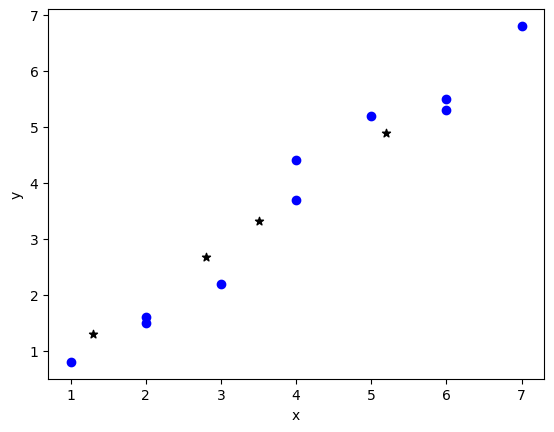

In [19]:
X_test = np.array([[1.3], [3.5], [5.2], [2.8]])

predictions = predict(X_test, weights)

import matplotlib.pyplot as plt
plt.scatter(X_train[:, 0], y_train, marker='o', c='b')
plt.scatter(X_test[:, 0], predictions, marker='*', c='k')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [20]:
# The diabetes example
from sklearn import datasets
diabetes = datasets.load_diabetes()
print(diabetes.data.shape)

num_test = 30
X_train = diabetes.data[:-num_test, :]
y_train = diabetes.target[:-num_test]


(442, 10)


In [21]:
weights = train_linear_regression(X_train, y_train, max_iter=5000, learning_rate=1, fit_intercept=True)

X_test = diabetes.data[-num_test:, :]
y_test = diabetes.target[-num_test:]

predictions = predict(X_test, weights)

print(predictions)
print(y_test)

2960.123025607216
1539.554802043756
1487.0293572901583
1480.280921685538
1479.0201696937393
1478.57947029736
1478.3009164521106
1478.0673513977845
1477.8521034731898
1477.647589314213
[232.22192119 123.87532386 166.12297497 170.23855082 228.12523411
 154.9570854  101.09011561  87.33479691 143.68827095 190.29424697
 198.00696804 149.63068784 169.56215468 109.01832867 161.97943375
 133.00757288 260.18431805 101.52516612 115.76691141 120.73229914
 219.62761982  62.21080727 136.29855757 122.27895603  55.14532638
 191.50289376 105.68864904 126.26137526 208.99754096  47.66481183]
[261. 113. 131. 174. 257.  55.  84.  42. 146. 212. 233.  91. 111. 152.
 120.  67. 310.  94. 183.  66. 173.  72.  49.  64.  48. 178. 104. 132.
 220.  57.]


## Implementing linear regression with scikit-learn 

In [22]:
# Directly use SGDRegressor from scikit-learn
from sklearn.linear_model import SGDRegressor
regressor = SGDRegressor(loss='squared_error', 
                         penalty='l2', 
                         alpha=0.0001, 
                         learning_rate='constant', 
                         eta0=0.2,
                         max_iter=100, 
                         random_state=42)


In [23]:
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
print(predictions)

[213.10213626 108.68382244 152.18820636 153.81308148 208.42650616
 137.24771808  88.91487772  73.83269079 131.35148348 173.65164632
 178.16029669 135.26642772 152.92346973  89.39394334 149.98088897
 117.62875063 241.90665387  86.59992328 101.90393228 105.13958969
 202.13586812  50.60429115 121.43542595 106.34058448  41.11664041
 172.53683431  95.43229463 112.59395222 187.40792     36.1586737 ]


## Implementing linear regression with TensorFlow

In [24]:
import tensorflow as tf

In [25]:
layer0 = tf.keras.layers.Dense(units=1, input_shape=[X_train.shape[1]])
model = tf.keras.Sequential(layer0)


In [26]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(1))


In [27]:
model.fit(X_train, y_train, epochs=100, verbose=True)


Epoch 1/100
13/13 [==============================] - 1s 4ms/step - loss: 27667.6582
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 23819.5781
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 20415.3184
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 17483.2656
Epoch 5/100
13/13 [==============================] - 0s 750us/step - loss: 14915.0195
Epoch 6/100
13/13 [==============================] - 0s 833us/step - loss: 12778.4043
Epoch 7/100
13/13 [==============================] - 0s 833us/step - loss: 10970.9189
Epoch 8/100
13/13 [==============================] - 0s 833us/step - loss: 9471.6514
Epoch 9/100
13/13 [==============================] - 0s 833us/step - loss: 8235.5283
Epoch 10/100
13/13 [==============================] - 0s 750us/step - loss: 7239.2500
Epoch 11/100
13/13 [==============================] - 0s 833us/step - loss: 6430.8574
Epoch 12/100
13/13 [==============================] - 0s 750us/s

13/13 [==============================] - 0s 750us/step - loss: 2973.2327
Epoch 97/100
13/13 [==============================] - 0s 750us/step - loss: 2971.6487
Epoch 98/100
13/13 [==============================] - 0s 667us/step - loss: 2972.5449
Epoch 99/100
13/13 [==============================] - 0s 750us/step - loss: 2970.8496
Epoch 100/100
13/13 [==============================] - 0s 667us/step - loss: 2970.1348


In [28]:
predictions = model.predict(X_test)[:, 0]
print(predictions)

1/1 [==============================] - 0s 69ms/step
[231.87244  124.46891  167.07492  171.67328  228.05782  152.1618
 103.20677   92.20486  151.13374  190.63141  191.14505  153.18742
 169.42885  106.73273  167.38188  133.95255  259.7947   101.85489
 119.551254 121.691284 219.48799   65.594696 138.60153  123.87756
  57.003967 189.77586  108.673965 129.55598  205.46254   48.874237]


---

Readers may ignore the next cell.

In [29]:
!jupyter nbconvert --to python ch5_part1.ipynb --TemplateExporter.exclude_input_prompt=True

[NbConvertApp] Converting notebook ch5_part1.ipynb to python
[NbConvertApp] Writing 8116 bytes to ch5_part1.py
